In [1]:
# Analytical Tools
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# General Utilities
import math
import json
import pprint
import itertools
import importlib

# Some settings
from IPython.display import Markdown, display
log = pprint.pprint
space = lambda: print()
printmd = lambda text: display(Markdown(text))
%matplotlib inline

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [2]:
anagram = ['CAMHOMK', 
						'AYUGNHT', 
						'LUBMEJD',
						'AXPLINE',]

solutions = 'hammock|naughty|jumbled|explain'

In [3]:
with open('pilot2.json') as json_file:
    data = json.load(json_file) 

{'rt': 3567,
 'stimulus': "<center><p>Now the <b>black</b> anagram will be shown to you.</p> <p>If you are not able to solve the anagram in <b>1 minute</b>, you will be taken to the next screen.</p> <p>Press 'v' to view the anagram. </p></center>",
 'key_press': 86,
 'trial_type': 'html-keyboard-response',
 'trial_index': 12,
 'time_elapsed': 218546,
 'internal_node_id': '0.0-3.1-0.1',
 'responseType': 'finish',
 'participantID': 'srpzsfwo4h1wao66pw1j9vh107r87pub',
 'black_problems': ['ECELT'],
 'blue_problems': ['YUOEJRN']}

Collect data in separate structures for non-insight (to check answers) and in 1 for anagram

In [4]:
black_anagram = []
black_anagram_ans = []
black_anagram_aha = []
black_anagram_rt = []

blue_anagram = []
blue_anagram_ans = []
blue_anagram_aha = []
blue_anagram_rt = []

num_subs = 0

for i in range(len(data)): #go thru the subjects
    if len(data[i]['data']) > 4: #only look at subjects that finished the task 
            num_subs = num_subs + 1            
            quiz_answer = data[i]['data'][3]['responses'] #get answer to quiz answer
            if '2 minutes' in quiz_answer:
                j = 3
            else:
                quiz_answer = data[i]['data'][5]['responses']
                if '2 minutes' in quiz_answer:
                    j = 5 
                else:
                    j = 7
            
            for k in range(2):
                color = data[i]['data'][j+1]['stimulus'] #which colored stimulus were they shown?
                if 'blue' in color:
                    blue_anagram.append(data[i]['data'][j+2]['blue_problems'][0])
                    rt = data[i]['data'][j+2]['rt']/1000
                    blue_anagram_rt.append(rt)
                    blue_anagram_ans.append(data[i]['data'][j+2]['responses'])
                    aha = int(data[i]['data'][j+4]['responses'][6])
                    blue_anagram_aha.append(aha)
                    j = j+4
                elif 'black' in color:
                    black_anagram.append(data[i]['data'][j+2]['black_problems'][0])
                    rt = data[i]['data'][j+2]['rt']/1000
                    black_anagram_rt.append(rt)
                    black_anagram_ans.append(data[i]['data'][j+2]['responses'])
                    aha = int(data[i]['data'][j+3]['responses'][6])
                    black_anagram_aha.append(aha)
                    j = j+3

print('we recruited ', num_subs, ' subjects')

we recruited  101  subjects


Convert data into df and do a filtering based on correct responses

In [22]:
d1 = {'anagrams':black_anagram,
     'answers':black_anagram_ans, 
     'rts': black_anagram_rt,
     'aha': black_anagram_aha}

d2 = {'anagrams':blue_anagram,
     'answers':blue_anagram_ans, 
     'rts': blue_anagram_rt,
     'aha': blue_anagram_aha}

df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = df1.loc[(df1['answers'].str.contains(solutions, case = False)==True)]

df3 = df3[df3['rts'] < 21]
#df3 = df3[df3['rts'] > 9]

df4 = df2#[df2['rts'] > 20]
df4_2 = df4#.loc[(df4['answers'].str.contains(solutions, case = False)==False)]
#df2_filtered = df2[df2['rts'] > 15000]

In [23]:
print(len(df3), len(df4_2))
print(df3['aha'].mean(), df4_2['aha'].mean())
print(df3['rts'].mean(), df3['rts'].std(), df4_2['rts'].mean(), df4_2['rts'].std())

44 101
3.909090909090909 2.9405940594059405
12.070227272727273 4.325615626913358 16.464762376237626 5.143808132402519


In [24]:
dft3 = df3.groupby(['anagrams']).agg(['mean', 'std', 'count'])
dft4 = df4_2.groupby(['anagrams']).agg(['mean', 'std', 'count'])
dft3

rts                       aha                
               mean       std count      mean       std count
anagrams                                                     
AXPLINE    9.455727  3.373068    11  3.636364  1.629278    11
AYUGNHT   12.408556  4.459306    18  3.944444  1.862074    18
CAMHOMK   14.255818  4.159650    11  4.181818  1.721522    11
LUBMEJD   11.727250  4.059911     4  3.750000  1.892969     4

Plot it!

/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


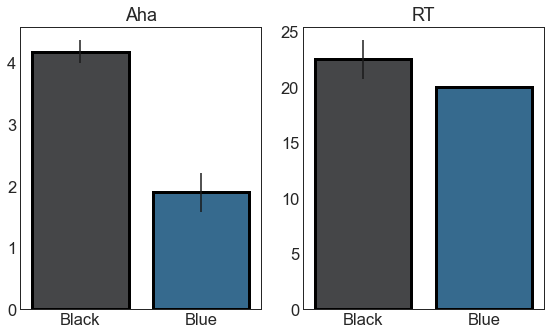

In [17]:
import seaborn as sns
sns.set(style="white", font_scale=1.5, rc={'figure.figsize':(8,5), 
                                              "grid.linewidth": 1, "axes.linewidth": 1, 'patch.linewidth': 3.0})

color = ['#454648', '#276d9d']
plt.subplot(1, 2, 1)
ax = sns.barplot(np.arange(2), [df3_2['aha'].mean(), df4_2['aha'].mean()]
                 , yerr=[df3_2['aha'].sem(), df4_2['aha'].sem()], 
                 palette = color, edgecolor = 'black')
plt.xticks(np.arange(2), ['Black','Blue'])
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Aha')

plt.subplot(1, 2, 2)
ax = sns.barplot(np.arange(2), [df3_2['rts'].mean(), df4_2['rts'].mean()]
                 , yerr=[df3_2['rts'].sem(), df4_2['rts'].sem()], 
                 palette = color, edgecolor = 'black')
plt.xticks(np.arange(2), ['Black','Blue'])
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('RT')

plt.tight_layout()
plt.show()

(array([ 2.,  3.,  2.,  3.,  0.,  5.,  2.,  0.,  3.,  2.,  1.,  3.,  2.,
         5.,  2.,  1.,  3.,  1.,  2., 59.]),
 array([ 3.695  ,  4.53195,  5.3689 ,  6.20585,  7.0428 ,  7.87975,
         8.7167 ,  9.55365, 10.3906 , 11.22755, 12.0645 , 12.90145,
        13.7384 , 14.57535, 15.4123 , 16.24925, 17.0862 , 17.92315,
        18.7601 , 19.59705, 20.434  ]),
 <BarContainer object of 20 artists>)

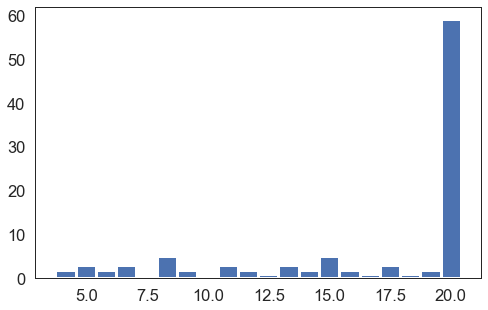

In [24]:
plt.hist(df2['rts'], 20)

Anagram analysis

Analyze only those responses for which people's confidence is greater than 5

Plot distribution of curiosity ratings below